# Introdución á sintaxe de Python II: librerías

Continuando ca introducción a Python, analizaremos unhos datos almacenados nuna serie de ficheiros tipo csv (_comma separated values_). Estos datos corresponden á evolución da inflamación duhna serie de pacientes (filas) fronte a un tratamento de artritis ó longo dos días de tratamento (colunas).

Obxectivos:

* Primeiro contacto con librerías: que son e para que se usan.
* Cargar unha librería e acceder ós seus contidos.
* Ler datos dun ficheiro de texto e almacenalos nun array (_arranxos_).
* Acceder os elementos e seccións do array.
* Operar con elementos do array.
* Representalos datos en gráficos sinxelos.

---

##### Os materiais desta clase son unha adaptación de: http://swcarpentry.github.io/python-novice-inflammation/ distribuidos baixo licenza [Creative Commons Attribution license](https://software-carpentry.org/license/)

## Cargando os datos

Para cargar os datos, faremos uso (por primeira vez) dunha librería. As librerías empaquetan distintas funcións, estruturas de datos, variables... que poden ser reutilizadas noutros programas. Neste caso usaremos NumPy (_Numerical Python_).

In [1]:
import numpy as np

Una vez importada a librería, pódese aceder ó seus contidos:

In [2]:
# Usando a función que carga os datos
np.loadtxt(fname='../data/swc/inflammation-01.csv', delimiter=',')

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

A expresión `np.loadtxt(...)` é unha chamada a unha función que denominada `loadtxt` que pertence á librería `numpy`. Esta sintaxe que utiliza o punto para indicala pertenenza a usaremos en moitas mais ocasións ó longo do curso.

Na sentencia anterior "cargamos" os datos, pero non os metemos en ninguna variable.

In [3]:
# Almacenando os datos
data = np.loadtxt(fname='../data/swc/inflammation-01.csv', delimiter=',')

print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


Pódese comprobar o tipo de dato que representa `data` e o tipo de los valores que contén:

In [4]:
# Tipo de datos
type(data)

numpy.ndarray

In [5]:
# Tipo dos valores de data
data.dtype

dtype('float64')

Comprabamos que obtivemos un `numpy.ndarray`: un array (_arranzo_) é un bloque de memoria que contiene elementos do mesmo tipo. Básicamente:

* _lembran_ ós vectores, matrices, tensores...
* pódese almacenar o array cun nombre e acceder ós seus elementos mediante os seus _índices_.
* axudan a gestionar de xeito eficiente a memoria e a acelera-los cálculos.


---

| Índice     | 0     | 1     | 2     | 3     | ...   | n-1   | n  |
| ---------- | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Valor      | 2.1   | 3.6   | 7.8   | 1.5   | ...   | 5.4   | 6.3 |

---

O que se soe gradar nua arrays son:

* Vectores e matrices.
* Datos de experimentos:
    - En distintos instantes discretos.
    - En distintos pontos do espazo.
* Resultados de funcións que facemos operar sobre os datos anteriores.
* Discretizacións para usar algoritmos de: integración, derivación, interpolación...
* ... 

Segundo temos observado, ó imprimir o contido de `data`, trata dun array de dúas dimensións, pero   
* cantos elementos ten? 
* cantos elementos ten en cada dimensión?

In [6]:
data.size

2400

In [7]:
data.shape

(60, 40)

O resultado é que ten 60 filas e 40 columnas, é dicir, 2400 elementos.

`size` e  `shape` son atributos do array, esto é, son variables ligadas ó array.

### Accedendo ós elementos do array 

Para acceder a elementos de un array, lo haremos entre paréntesis, al igual que hacíamos con listas y tuplas:

In [8]:
print('Primero valor en data:', data[0, 0])

Primero valor en data: 0.0


In [9]:
print('Valor do medio in data:', data[30, 20])

Valor do medio in data: 13.0


<div class="alert alert-info"><strong>Lembra:</strong>:
En Python a indexación comenza en cero como no C, C++, Java e Perl; a diferencia do MATLAB e do Fortran nos qque empeza en un (inda que neste último pódese escoller).
Polo tanto, un array de M&times;N (M filas e N colunas) ten índices que van dende 0 hasta M-1 e N-1. Ó principio costa algo facerse a esto.
</div>

### Debullando o array 

Algo como `[30, 20]` accede a un só elemento do array, pero pódense seleccionar mais elementos á vez usando a sintaxis `[start:stop:step]`.  
Por exemplo, pódese traer os dez primeiros días para os primeros catro pacientes con:

In [10]:
# primeiros dez días para os primeiros catro pacientes
print(data[0:4, 0:10])

[[0. 0. 1. 3. 1. 2. 4. 7. 8. 3.]
 [0. 1. 2. 1. 2. 1. 3. 2. 2. 6.]
 [0. 1. 1. 3. 3. 2. 6. 2. 5. 9.]
 [0. 0. 2. 0. 4. 2. 2. 1. 6. 7.]]


En realidade, non fai falla por o valor inicial si é cero.

In [11]:
print(data[:4, :10])

[[0. 0. 1. 3. 1. 2. 4. 7. 8. 3.]
 [0. 1. 2. 1. 2. 1. 3. 2. 2. 6.]
 [0. 1. 1. 3. 3. 2. 6. 2. 5. 9.]
 [0. 0. 2. 0. 4. 2. 2. 1. 6. 7.]]


e pódese traer calquera outra seción:

In [12]:
print(data[5:10, 0:10])

[[0. 0. 1. 2. 2. 4. 2. 1. 6. 4.]
 [0. 0. 2. 2. 4. 2. 2. 5. 5. 8.]
 [0. 0. 1. 2. 3. 1. 2. 3. 5. 3.]
 [0. 0. 0. 3. 1. 5. 6. 5. 5. 8.]
 [0. 1. 1. 2. 1. 3. 5. 3. 5. 8.]]


así como saltar elementos:

In [13]:
print(data[0:10:3, 0:10:2])

[[0. 1. 1. 4. 8.]
 [0. 2. 4. 2. 6.]
 [0. 2. 4. 2. 5.]
 [0. 1. 1. 5. 5.]]


Lembra que o último non está incluido

In [14]:
# Tomando unha sección mais pequena
pequena = data[:3, 36:]

pequena

array([[2., 3., 0., 0.],
       [1., 1., 0., 1.],
       [2., 2., 1., 1.]])

__NumPy__ non só provee unha estrutura para almacenar elementos dun xeito eficiente, senón tamén de moitas funcións para realizar operacións con eles. Por exemplo, pódese obtener a inflamación media:

In [15]:
data.mean()

6.14875

La función media, está disponible como **función** (`np.mean`) y como **método** de un array (`ndarray.mean()`). Las funciones ya las conocemos, se puede decir que un método es una función que pertenece a un elemento, del mismo modo que las variables que pertenecen a ese elemento se llaman atributos.

Los arrays de NumPy tienen numerosos métodos:

In [16]:
# máximo
print('Inflamación máxima:', data.max())
# mínimo
print('Inflamación mínima:', data.min())
# desviación típica
print('Desviación típica :', data.std())

Inflamación máxima: 20.0
Inflamación mínima: 0.0
Desviación típica : 4.613833197118566


Cando se analizan datos, é moi corrente aplicar estas funcións a partes do array, por exemplo: a un paciente determinado ou un día en concreto. Poderíaes facer do seguinte xeito:

In [17]:
# Seleccionando o primeiro paciente
patient_0 = data[0, :] 
# Calculando o seu máximo
print('Inflamación máxima do paciente 0:', patient_0.max())

Inflamación máxima do paciente 0: 18.0


Se se quere facer esto para cada paciente, pódese aplicar esta operación a un dos eixos ó completo, no noso caso, quereríamos a media ó longo de cada fila, é dicir, calcula-la media ó longo das colunas (`axis = 1`)

In [18]:
data.mean(axis=1)

array([5.45 , 5.425, 6.1  , 5.9  , 5.55 , 6.225, 5.975, 6.65 , 6.625,
       6.525, 6.775, 5.8  , 6.225, 5.75 , 5.225, 6.3  , 6.55 , 5.7  ,
       5.85 , 6.55 , 5.775, 5.825, 6.175, 6.1  , 5.8  , 6.425, 6.05 ,
       6.025, 6.175, 6.55 , 6.175, 6.35 , 6.725, 6.125, 7.075, 5.725,
       5.925, 6.15 , 6.075, 5.75 , 5.975, 5.725, 6.3  , 5.9  , 6.75 ,
       5.925, 7.225, 6.15 , 5.95 , 6.275, 5.7  , 6.1  , 6.825, 5.975,
       6.725, 5.7  , 6.25 , 6.4  , 7.05 , 5.9  ])

Como comporbación rápida, pode´moslle pedir ó python o shape do array:

In [19]:
data.mean(axis=1).shape

(60,)

Por descontado, pódese tamén obter a media diaría da inflamación:

In [20]:
data.mean(axis=0)

array([ 0.        ,  0.45      ,  1.11666667,  1.75      ,  2.43333333,
        3.15      ,  3.8       ,  3.88333333,  5.23333333,  5.51666667,
        5.95      ,  5.9       ,  8.35      ,  7.73333333,  8.36666667,
        9.5       ,  9.58333333, 10.63333333, 11.56666667, 12.35      ,
       13.25      , 11.96666667, 11.03333333, 10.16666667, 10.        ,
        8.66666667,  9.15      ,  7.25      ,  7.33333333,  6.58333333,
        6.06666667,  5.95      ,  5.11666667,  3.6       ,  3.3       ,
        3.56666667,  2.48333333,  1.5       ,  1.13333333,  0.56666667])

##### Exercicio

No só se poden facer secións dun array, xa véramos que as _listas_ e as _tuplas_ tamén o permiten e, ó longo do curso atoparemos outras colecións de datos ás que se pode chegar deste xeito. Imos a usar o _slicing_, qué é como se chama esta técnica ou operación en python, sobre os _strings_:

Partimos do string `"ó saír ría só"`:

In [21]:
# preserve
palindromo = 'ó saír ría só'

1.  Que devolve `palindromo[:4]`? 
    e  `palindromo[4:]`?
    e `palindromo[:]`?

2.  Que valor ten `palindromo[-1]`?
    e `palindromo[-2]`?
    Dados estos resultados, que fai  `palindromo[1:-1]`?

3.  A expresión `palindromo[3:3]` produce unha cadea valeira 
    que devolve `data[3:3, 4:4]`?
    e  `data[3:3, :]`?

## Visualización

Unha das mellores maneiras de tirar información dos datos é representarlos. A contiuación, faremos unha pequena introdución á visualización con __matplotlib__. Haberá tempo de abondar, pero tratemos de mostrar gráficamente os datos de inflamación.

Empezamos pola *función máxica*:

In [22]:
%matplotlib inline

As _funcións máxicas_ son funcións propias de __Jupyter__. Neste caso estamos indicandolle que a saída da representación quede embebida no propio _Notebook_

Ahora importaremos el módulo pyplot de matplotlib:

In [23]:
import matplotlib.pyplot as plt

e representamos tódolos datos:

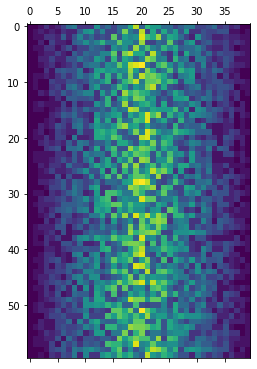

In [24]:
plt.matshow(data)

As rexións azuis corresponden a valores baixos de inflamación, mentras que as amarelas indican valores mais altos. Pódese ver como ó longo dos cuarenta días a inflamación aumenta e logo debece en tódolos pacientes.

A representación da inflamación media de tódolos pacientes para cada día  quedaría deste xeito:

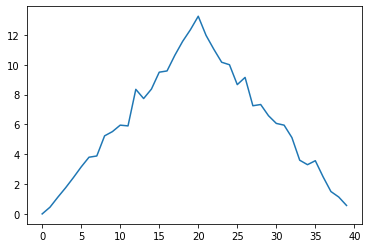

In [25]:
ave_inflammation = data.mean(axis=0)
plt.plot(ave_inflammation)

tamén as inflamacións máxima e mínima:

Inflamación máxima por día


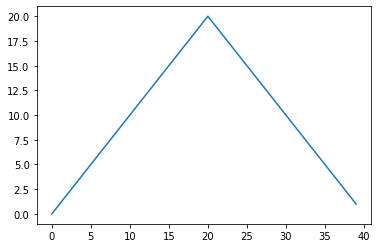

Inflamación mínima por día


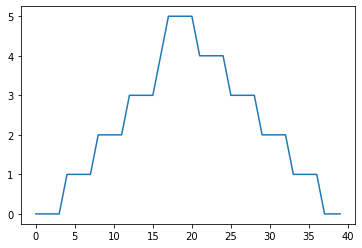

In [26]:
print('Inflamación máxima por día')
plt.plot(data.max(axis=0))
plt.show()

print('Inflamación mínima por día')
plt.plot(data.min(axis=0))
plt.show()

##### Exercicio 

1. Facer un gráfico que amose a desviación típica dos datos, cada día, para tódolos pacientes.
2. Facer un gráfico que amose á vez a inflamación máxima, media e mínima, para cada día.

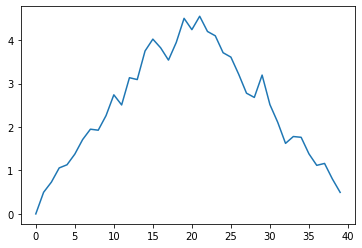

In [27]:
plt.plot(data.std(axis=0))

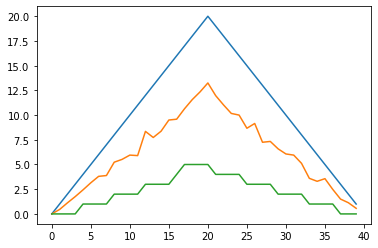

In [28]:
plt.plot(data.max(axis=0))
plt.plot(data.mean(axis=0))
plt.plot(data.min(axis=0))

---
** En resumen**:
* Importamos unha librería por primeira vez e o temos feito cun alias.
* Vimos como acceder ós atributos dos arrays como `shape` e `size`, así como ós métodos como `max` o `std`.
* Vimos como acceder a elementos e seccións dun array
* Vimos como aplicar algúns dos métodos só ás colunas ou ás filas dun array.
* Fixemos as nosas primeiras representacións con __matplotlib__

---
Este Tutorial está baseado no feito polo grupo de __Aeropython__

#### <h7 align="right">¡Ségeos en Twitter!
<br/>
###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> 
<br/>
###### O notebook orixinal foi realizado por: Juan Luis Cano, Mabel Delgado y Álex Sáez 
<br/>
##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> e distribúese baixo unha <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licenza Creative Commons Atribución 4.0 Internacional</a>.

---
_As seguintes celas conteñen a configuración do Notebook_

_Para visualizalas e usar os enlaces a Twitter e notebook debe executarse coma [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [29]:
# Esta cela da o estilo ó notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())